In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
train_data = pd.read_csv('Downloads/adult/adult.data', header=None)
test_data = pd.read_csv('Downloads/adult/adult.test', header=None, skiprows=1)

#print(train_data.shape)
#print(test_data.shape)
print(train_data[0:5])
print("==========================")
print(test_data[0:5])

   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_data.columns = columns
test_data.columns = columns


In [4]:
# 處理名目型欄位
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for column in categorical_columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    test_data[column] = le.fit_transform(test_data[column])

In [5]:

print(train_data[0:10])
print('===================================================================================')
print(test_data[0:10])

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   
5   37          4  284582         12             14               2   
6   49          4  160187          6              5               3   
7   52          6  209642         11              9               2   
8   31          4   45781         12             14               4   
9   42          4  159449          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2       

In [6]:
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
test_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
max_worktime=(train_data.max(axis=0)[12])
min_worktime=(train_data.min(axis=0)[12])
print(max_worktime)
print(min_worktime)


99
1


In [9]:

train_data_min = train_data.min(axis=0)
train_data_max = train_data.max(axis=0)
train_data -= train_data_min 
train_data /= (train_data_max-train_data_min)
test_data -= train_data_min 
test_data /= (train_data_max-train_data_min)


In [10]:
X_train_income = train_data.drop(columns=['income'])
y_train_income = train_data['income']
X_test_income = test_data.drop(columns=['income'])
y_test_income = test_data['income']

In [11]:
from keras import models
from keras import layers
from keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(X_train_income.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(X_train_income, y_train_income, epochs=80, batch_size= 16,verbose=1 , validation_data =(X_test_income, y_test_income))

Epoch 1/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7788 - loss: 0.4753 - val_accuracy: 0.8303 - val_loss: 0.3689
Epoch 2/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8331 - loss: 0.3635 - val_accuracy: 0.8386 - val_loss: 0.3437
Epoch 3/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8381 - loss: 0.3497 - val_accuracy: 0.8404 - val_loss: 0.3387
Epoch 4/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8377 - loss: 0.3460 - val_accuracy: 0.8175 - val_loss: 0.3652
Epoch 5/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8423 - loss: 0.3369 - val_accuracy: 0.8349 - val_loss: 0.3539
Epoch 6/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8464 - loss: 0.3295 - val_accuracy: 0.8372 - val_loss: 0.3426
Epoch 7/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8409 - loss: 0.3370 - val_accuracy: 0.8465 - val_loss: 0.3311
Epoch 8/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8437 - loss: 0.3340 - 

2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8484 - loss: 0.3267 - val_accuracy: 0.8533 - val_loss: 0.3266
Epoch 51/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8524 - loss: 0.3217 - val_accuracy: 0.8478 - val_loss: 0.3293
Epoch 52/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.8511 - loss: 0.3270 - val_accuracy: 0.8509 - val_loss: 0.3300
Epoch 53/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8502 - loss: 0.3233 - val_accuracy: 0.8439 - val_loss: 0.3418
Epoch 54/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8520 - loss: 0.3269 - val_accuracy: 0.8494 - val_loss: 0.3286
Epoch 55/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8476 - loss: 0.3267 - val_accuracy: 0.8490 - val_loss: 0.3301
Epoch 56/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8503 - loss: 0.3238 - val_accuracy: 0.8507 - val_loss: 0.3290
Epoch 57/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8514 - loss: 0.3268 - va

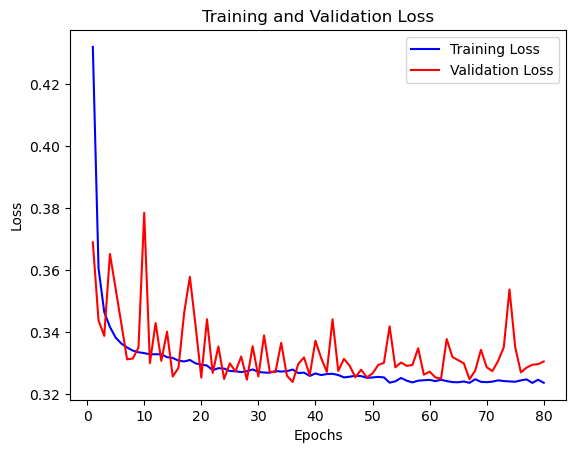

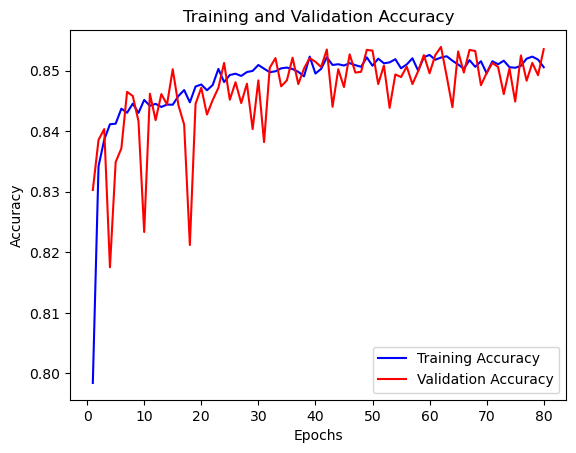

In [13]:
import matplotlib.pyplot as plt

# 獲取訓練過程中的損失和準確率
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# 繪製損失曲線
#plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss,'b', label='Training Loss')
plt.plot(epochs, val_loss,'r' ,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
#plt.grid(True)
plt.show()

# 繪製準確率曲線
#plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc,'b', label='Training Accuracy')
plt.plot(epochs, val_acc,'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
#plt.grid(True)
plt.show()

In [14]:
X_train_worktimes = train_data.drop(columns=['hours-per-week'])
y_train_worktimes = train_data['hours-per-week']#*(max_worktime-min_worktime)+min_worktime
X_test_worktimes = test_data.drop(columns=['hours-per-week'])
y_test_worktimes = test_data['hours-per-week']#*(max_worktime-min_worktime)+min_worktime
print(X_train_worktimes[0:10])
print(y_train_worktimes[0:10])

        age  workclass    fnlwgt  education  education-num  marital-status  \
0  0.301370      0.875  0.044302   0.600000       0.800000        0.666667   
1  0.452055      0.750  0.048238   0.600000       0.800000        0.333333   
2  0.287671      0.500  0.138113   0.733333       0.533333        0.000000   
3  0.493151      0.500  0.151068   0.066667       0.400000        0.333333   
4  0.150685      0.500  0.221488   0.600000       0.800000        0.333333   
5  0.273973      0.500  0.184932   0.800000       0.866667        0.333333   
6  0.438356      0.500  0.100448   0.400000       0.266667        0.500000   
7  0.479452      0.750  0.134036   0.733333       0.533333        0.333333   
8  0.191781      0.500  0.022749   0.800000       0.866667        0.666667   
9  0.342466      0.500  0.099947   0.600000       0.800000        0.333333   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0    0.071429           0.2   1.0  1.0      0.021740           0.0   
1

In [15]:
from keras import models
from keras import layers
from keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(X_train_worktimes.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Train it on the entirety of the data.
history=model.fit(X_train_worktimes, y_train_worktimes,epochs=80, batch_size=16, verbose=1, validation_data =(X_test_worktimes, y_test_worktimes))
test_mse_score, test_mae_score = model.evaluate(X_test_worktimes, y_test_worktimes)

Epoch 1/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0193 - mae: 0.0964 - val_loss: 0.0143 - val_mae: 0.0855
Epoch 2/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0135 - mae: 0.0814 - val_loss: 0.0135 - val_mae: 0.0805
Epoch 3/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0131 - mae: 0.0801 - val_loss: 0.0168 - val_mae: 0.0990
Epoch 4/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0130 - mae: 0.0797 - val_loss: 0.0137 - val_mae: 0.0846
Epoch 5/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0128 - mae: 0.0791 - val_loss: 0.0130 - val_mae: 0.0790
Epoch 6/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0129 - mae: 0.0791 - val_loss: 0.0133 - val_mae: 0.0804
Epoch 7/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0126 - mae: 0.0786 - val_loss: 0.0140 - val_mae: 0.0846
Epoch 8/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0126 - mae: 0.0783 - val_loss: 0.0130 - val_mae: 0.0789
Epoch 9/80
2036/2036 ━━━━━━━━━━━━━━━━━━━

Epoch 54/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0119 - mae: 0.0759 - val_loss: 0.0125 - val_mae: 0.0767
Epoch 55/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0123 - mae: 0.0768 - val_loss: 0.0129 - val_mae: 0.0765
Epoch 56/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0121 - mae: 0.0763 - val_loss: 0.0127 - val_mae: 0.0796
Epoch 57/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0120 - mae: 0.0765 - val_loss: 0.0128 - val_mae: 0.0764
Epoch 58/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0122 - mae: 0.0769 - val_loss: 0.0126 - val_mae: 0.0778
Epoch 59/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0123 - mae: 0.0772 - val_loss: 0.0125 - val_mae: 0.0772
Epoch 60/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0121 - mae: 0.0764 - val_loss: 0.0125 - val_mae: 0.0774
Epoch 61/80
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0122 - mae: 0.0763 - val_loss: 0.0126 - val_mae: 0.0785
Epoch 62/80
2036/2036 ━━━━━━━━━━

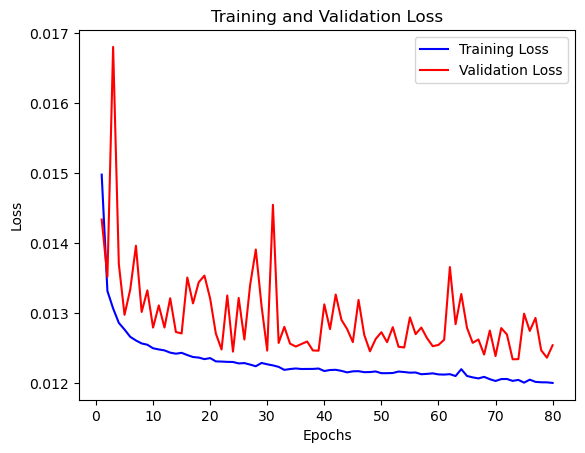

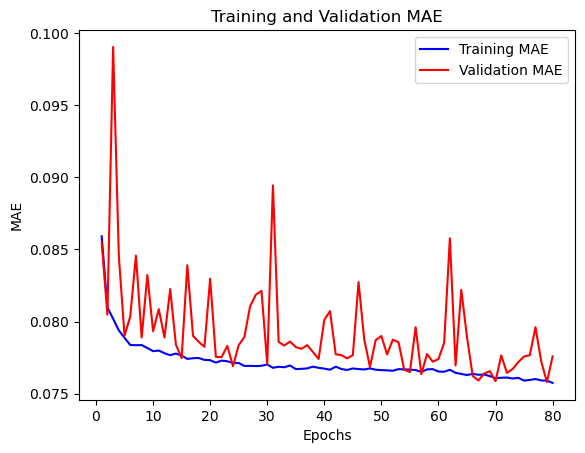

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss,'b', label='Training Loss')
plt.plot(epochs, val_loss,'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
train_acc = history.history['mae']
val_acc = history.history['val_mae']

plt.plot(epochs, train_acc,'b' ,label='Training MAE')
plt.plot(epochs, val_acc,'r' ,label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
#plt.grid(True)
plt.show()

In [18]:
test_mae_score

0.07758694142103195